In [344]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
import matplotlib as plt
class myrobo(DHRobot):
    
    def __init__(self):
        links = [
                RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 9.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               )
                ]
        
        super().__init__(links, name="KR300")
        self.payload(150)
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -1/2*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180

        
dof = 6
t = myrobo() 
# t.qz = np.random.rand(dof) 
# print(t.qz,t)
# t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
# t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
# t.qt = np.pi / 180
# acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
# print(t,acc, t.gravity)
# print(t.inertia(t.qz))

Restarted deepsys (Python 3.11.3)

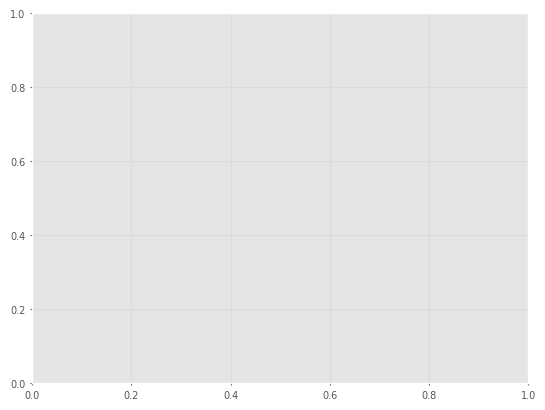

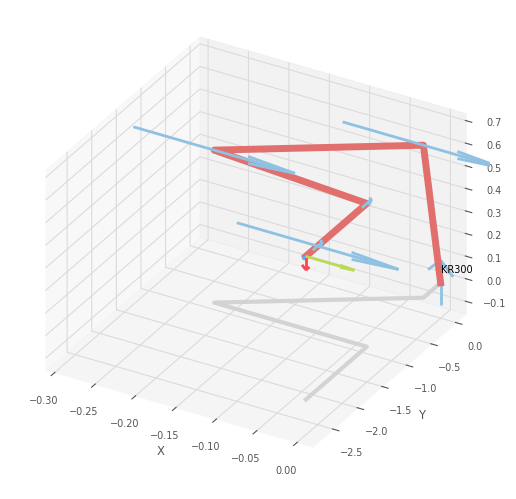

/home/ruiyuanli/miniconda3/envs/deepsys/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [213]:
from spatialmath import SE3, SE2
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from functools import partial

def update(data, robot, plot_moment,frame):
    # Clear the previous plot
    plt.cla()
    plot_moment.close()
    # for q in data.q
    robot.plot(data.q[frame])
    plot_moment.add(robot)

    # plot_moment.xlabel('X')
    # plot_moment.ylabel('Y')
    # plot_moment.title('Robot Animation')


    # Create a figure and axis object
fig, ax = plt.subplots()
time = np.arange(0, 5, 0.1)  # time
T0 = SE3(-1, 0.5, 0,)  # initial pose
T1 = SE3(1, 1.5, 0)  # final pose
Ts = rtb.tools.trajectory.ctraj(T0, T1, time)
pyplot = rtb.backends.PyPlot.PyPlot() 
robot_fig = t.plot([0, 0,0,0,0,0])

robot_fig.ax.set(xlim=(-1.5,
                    2), ylim=(-1.5, 2))

sol = t.ikine_LM(Ts)
# Set the axis limits if needed
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
# Create the animation
animation = FuncAnimation(fig, partial(update,data=sol, robot = t, plot_moment =robot_fig), frames=10)

# Display the animation
plt.show()

In [473]:
from scipy.io import loadmat
import numpy as np
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH
import roboticstoolbox as rtb
from spatialmath import SE3
import matplotlib.pyplot as plt

def calculate_velocity_and_acceleration(time_sequence, positions):
    """
    Calculate velocity and acceleration given a time sequence and corresponding positions.
    
    Parameters:
        time_sequence (list or numpy array): Time sequence.
        positions (numpy array): Matrix where rows are different time frames and columns are different joints.
        
    Returns:
        tuple: Tuple containing velocities and accelerations corresponding to the time sequence and positions.
    """
    num_time_frames, num_joints = positions.shape
    velocities = np.zeros_like(positions)
    accelerations = np.zeros_like(positions)
    
    # Calculate velocities
    for joint in range(num_joints):
        for i in range(1, num_time_frames):
            displacement = positions[i, joint] - positions[i-1, joint]
            time_interval = time_sequence[i] - time_sequence[i-1]
            velocities[i, joint] = displacement / time_interval
    
    # Calculate accelerations
    for joint in range(num_joints):
        for i in range(1, num_time_frames):
            velocity_change = velocities[i, joint] - velocities[i-1, joint]
            time_interval = time_sequence[i] - time_sequence[i-1]
            accelerations[i, joint] = velocity_change / time_interval
    
    return velocities, accelerations


file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data_with_val.mat"
# read the file into variable
file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data.mat"



df_industRobo =  loadmat(file_name_train)

u_train = df_industRobo["u_train"]
y_train = df_industRobo["y_train"]
# u_val   = df_industRobo["u_val"]
# y_val   = df_industRobo["y_val"]
u_test  = df_industRobo["u_test"]
y_test  = df_industRobo["y_test"]
time_test  = df_industRobo["time_test"]
time_train  = df_industRobo["time_train"]
u_train = np.asarray(u_train).T
y_train = np.asarray(y_train).T
# u_val = np.asarray(u_val).T
# y_val = np.asarray(y_val).T
u_test = np.asarray(u_test).T
y_test = np.asarray(y_test).T
time_test = np.asarray(time_test).T
# time_val = np.asarray(time_val).T
time_train = np.asarray(time_train).T

In [474]:
# Initial conditions
q0 = np.array([0, 0, 0, 0, 0, 0])   # Initial joint positions
qd0 = np.array([0, 0, 0, 0, 0, 0])  # Initial joint velocities
torque = u_test  # Example constant torques
dof_num = 6
print(torque[0:2])

q_lim_max =[]
q_lim_min = []

for i in range(dof_num):
    torque[:,i]= torque[:,i]*t.links[i].G
    q_lim_min.append( t.links[i].qlim[0])
    q_lim_max.append( t.links[i].qlim[1])
    
    # q_lim_max[i] = t.links[i].qlim[1]
    
print(torque[0:2],q_lim_min,q_lim_max)
# Integrate the equations of motion
q_list = []
qd_list = []
qdd_list = []
q = q0
qd = qd0

for index,dt in enumerate(np.diff(time_test,  axis=0)):
    q= np.clip(q,q_lim_min,q_lim_max )
    qdd = t.accel( q,qd  , torque[index] )
    # print(qdd)

    q = q + qd * dt
    qd = qd + qdd * dt
    q_list.append(q)
    qd_list.append(qd)
    qdd_list.append(qdd)

q_array = np.array(q_list)

[[ -0.15558833  -2.52080037 -11.18909214  -0.92236679  -1.02877239
   -1.58384896]
 [ -0.13852747  -2.57662454 -11.16684214  -0.91260083  -1.01899549
   -1.57261352]]
[[  -33.10297315  -513.03329182 -2156.69751041  -143.88921858
   -160.48849261  -161.82184852]
 [  -29.47310366  -524.39462714 -2152.40882179  -142.3657287
   -158.96329589  -160.67392354]] [-2.5656340004316647, -2.443460952792061, -1.9547687622336491, -6.108652381980153, -2.1380283336930535, -6.108652381980153] [2.5656340004316647, -0.08726646259971647, 2.670353755551324, 6.108652381980153, 2.1380283336930535, 6.108652381980153]


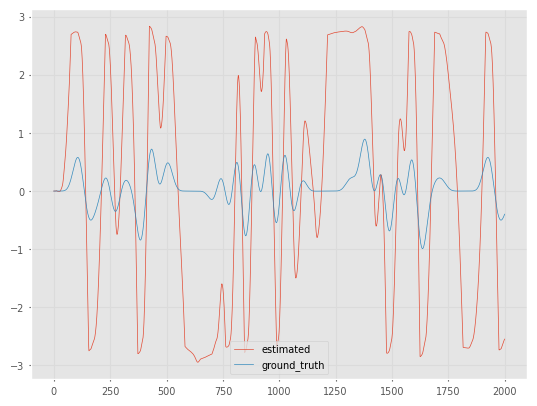

In [475]:

plt.plot(q_array[:2000,0], label = "estimated")
plt.plot(y_test[:2000,0]/180*np.pi,label = "ground_truth")
plt.legend()

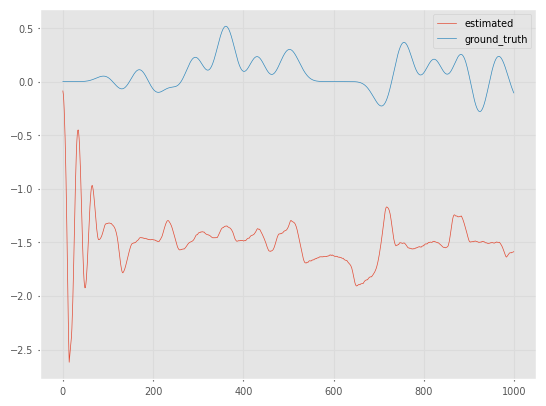

In [476]:

plt.plot(q_array[:1000,1], label = "estimated")
plt.plot(y_test[:1000,1]/180*np.pi,label = "ground_truth")
plt.legend()
# np.sqrt(np.mean((tau2[:,0]-u_test[:,0])**2))/u_test.shape[0]
# plt.plot(tau[:300,3])q_array

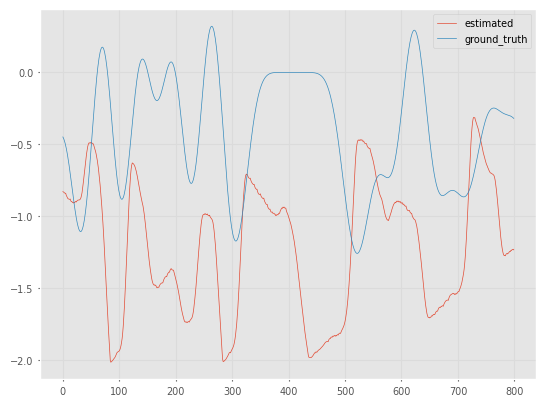

In [477]:

plt.plot(q_array[200:1000,2], label = "estimated")
plt.plot(y_test[200:1000,2]/180*np.pi,label = "ground_truth")
plt.legend()

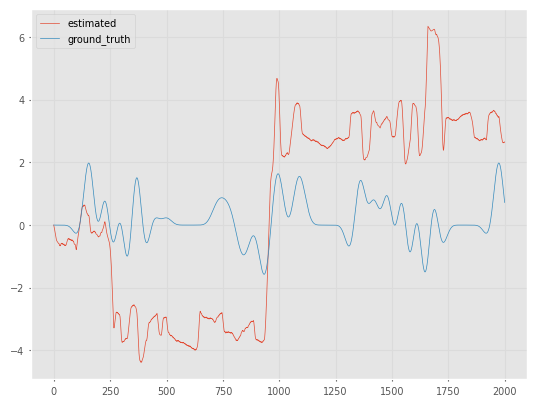

In [478]:
plt.plot(q_array[:2000,3], label = "estimated")
plt.plot(y_test[:2000,3]/180*np.pi,label = "ground_truth")
plt.legend()

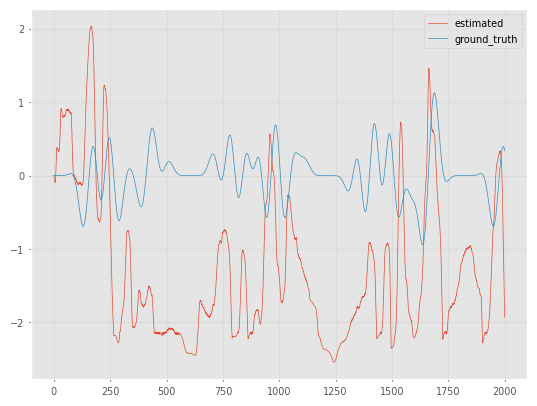

In [479]:
plt.plot(q_array[:2000,4], label = "estimated")
plt.plot(y_test[:2000,4]/180*np.pi,label = "ground_truth")
plt.legend()

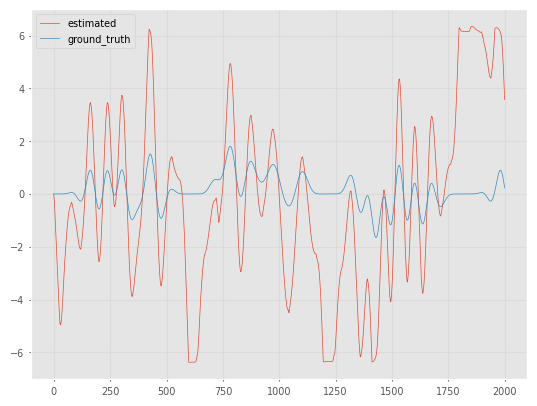

In [480]:
plt.plot(q_array[:2000,5], label = "estimated")
plt.plot(y_test[:2000,5]/180*np.pi,label = "ground_truth")
plt.legend()

In [165]:
q_array[0]

array([-2.74294264e+36, -4.44404206e+37, -1.97257969e+38, -1.62608544e+37,
       -1.81367308e+37, -2.79224467e+37])

In [448]:
from scipy.io import loadmat


file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data_with_val.mat"
# read the file into variable
file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data.mat"



df_industRobo =  loadmat(file_name_train)

u_train = df_industRobo["u_train"]
y_train = df_industRobo["y_train"]
# u_val   = df_industRobo["u_val"]
# y_val   = df_industRobo["y_val"]
u_test  = df_industRobo["u_test"]
y_test  = df_industRobo["y_test"]
time_test  = df_industRobo["time_test"]
time_train  = df_industRobo["time_train"]
u_train = np.asarray(u_train).T
y_train = np.asarray(y_train).T
# u_val = np.asarray(u_val).T
# y_val = np.asarray(y_val).T
u_test = np.asarray(u_test).T
y_test = np.asarray(y_test).T
time_test = np.asarray(time_test).T
# time_val = np.asarray(time_val).T
time_train = np.asarray(time_train).T
y_test=y_test/180*np.pi
velocities,accelerations = calculate_velocity_and_acceleration(time_test, y_test)
velocities2,accelerations2 = calculate_velocity_and_acceleration(time_test, -y_test)

tau3 = t.rne(-y_test, velocities2,accelerations2, gravity=[0,0,9.81])

/tmp/ipykernel_542542/1133403000.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  velocities[i, joint] = displacement / time_interval
/tmp/ipykernel_542542/1133403000.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accelerations[i, joint] = velocity_change / time_interval


In [449]:
y_test

array([[ 3.68264438e-07, -5.77156739e-07,  1.13922078e-05,
        -2.71632943e-09, -1.00050389e-08, -1.23067531e-09],
       [ 3.45712599e-07, -7.51057528e-07,  1.01839745e-05,
        -5.73572322e-10,  4.43663986e-10,  1.51936125e-09],
       [ 1.11980713e-07, -5.66423467e-07,  1.01617969e-05,
        -9.51900708e-10,  2.82834719e-09, -1.65542489e-10],
       ...,
       [ 1.50683579e-06,  1.34212252e-04,  3.29052592e-05,
         1.21706344e-07,  1.00640019e-07,  9.13135308e-08],
       [ 1.36630032e-06,  1.30068761e-04,  3.26158693e-05,
         1.81963530e-07,  1.17412064e-07,  6.68386426e-08],
       [ 1.34872231e-06,  1.28129512e-04,  3.22788395e-05,
         2.06443608e-07,  1.14243970e-07,  3.45217988e-08]])

1.2842796554039655

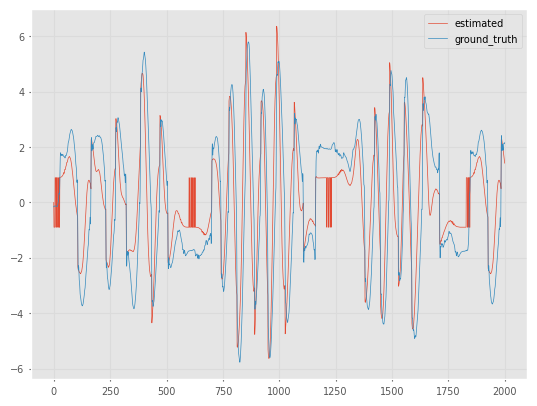

In [452]:
tau2 = t.rne(y_test, velocities,accelerations, gravity=[0,0,9.81])
plt.plot(tau2[:2000,0]/t.links[0].G, label = "estimated")
plt.plot(u_test[:2000,0],label = "ground_truth")
# plt.plot(y_test[:2000,0],label = "position")

plt.legend()
np.sqrt(np.mean((tau2[:,0]/t.links[0].G-u_test[:,0])**2/np.std(tau2[:,0]/t.links[0].G-u_test[:,0])))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


1.2842796554039655

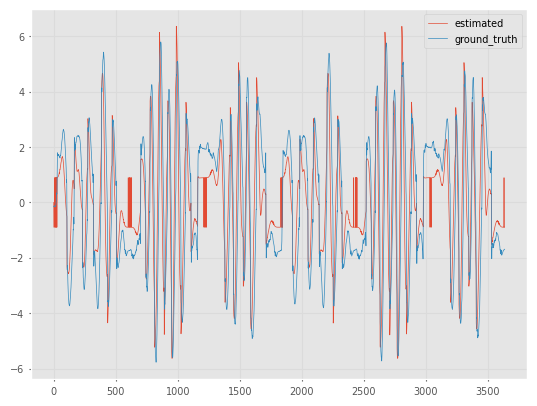

In [463]:
# tau2 = t.rne(y_test, velocities,accelerations, gravity=[0,0,9.81])
plt.plot(tau2[:,0]/t.links[0].G, label = "estimated")
plt.plot(u_test[:,0],label = "ground_truth")
# plt.plot(y_test[:2000,0],label = "position")

plt.legend()
np.sqrt(np.mean((tau2[:,0]/t.links[0].G-u_test[:,0])**2/np.std(tau2[:,0]/t.links[0].G-u_test[:,0])))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


22.782857375513636

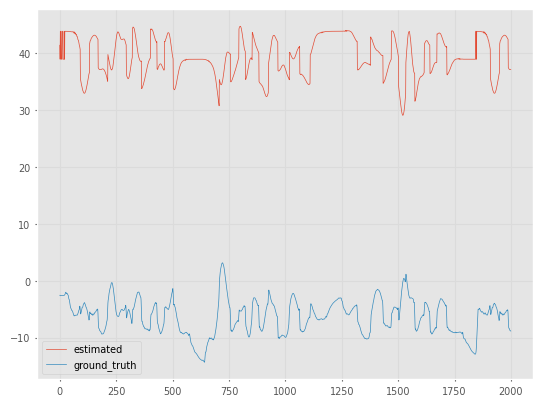

In [461]:

plt.plot(tau2[:2000,1]/t.links[1].G, label = "estimated")
plt.plot(u_test[:2000,1],label = "ground_truth")
plt.legend()
np.sqrt(np.mean((tau2[:,1]/t.links[1].G-u_test[:,1])**2)/np.std(tau2[:,1]/t.links[1].G-u_test[:,1]))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


10.734269569602363

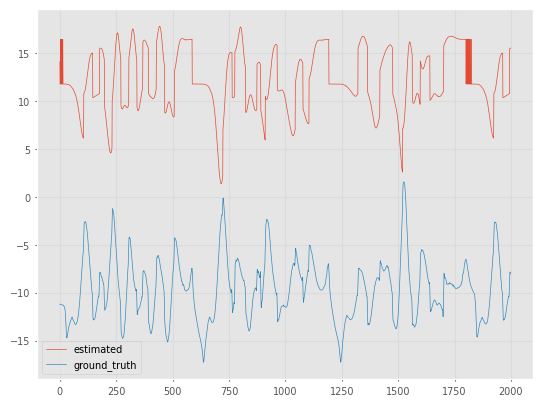

In [466]:

plt.plot(tau2[:2000,2]/t.links[2].G, label = "estimated")
plt.plot(u_test[:2000,2],label = "ground_truth")
plt.legend()
np.sqrt(np.mean((tau2[:,2]/t.links[2].G-u_test[:,2])**2)/np.std(tau2[:,2]/t.links[1].G-u_test[:,2]))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


11.562533126853861

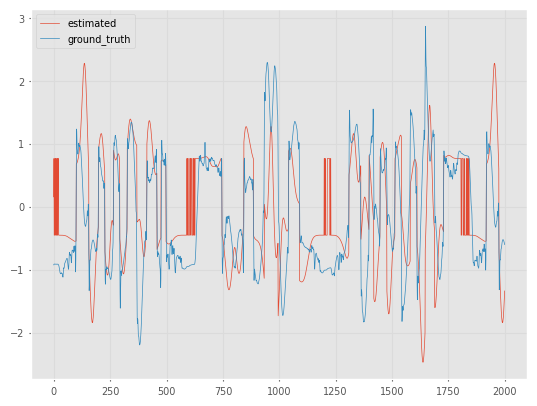

In [467]:

plt.plot(tau2[:2000,3]/t.links[3].G, label = "estimated")
plt.plot(u_test[:2000,3],label = "ground_truth")
plt.legend()
np.sqrt(np.mean((tau2[:,3]-u_test[:,3])**2)/np.std(tau2[:,3]-u_test[:,3]))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


23.342070910916664

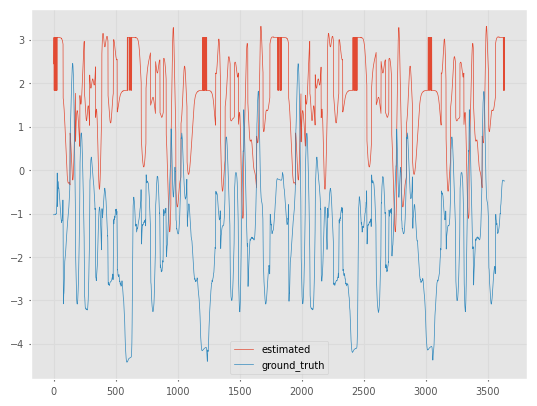

In [471]:
tau2 = t.rne(y_test, velocities,accelerations, gravity=[0,0,9.81])
plt.plot(tau2[:,4]/t.links[4].G, label = "estimated")
plt.plot(u_test[:,4],label = "ground_truth")
plt.legend()
np.sqrt(np.mean((tau2[:,4]-u_test[:,4])**2)/np.std(tau2[:,4]-u_test[:,4]))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


8.208479789498194

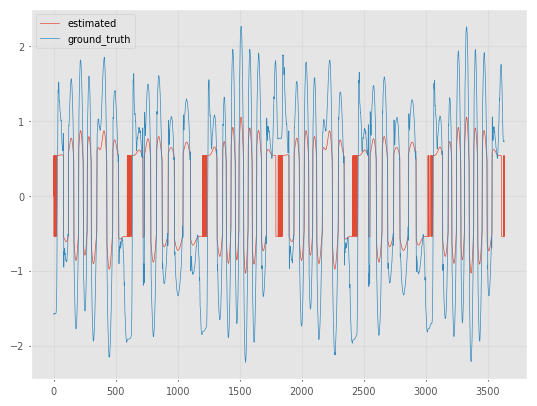

In [470]:
tau2 = t.rne(y_test, velocities,accelerations, gravity=[0,0,9.81])
plt.plot(tau2[:,5]/t.links[5].G, label = "estimated")
plt.plot(u_test[:,5],label = "ground_truth")
plt.legend()
np.sqrt(np.mean((tau2[:,5]-u_test[:,5])**2)/np.std(tau2[:,5]-u_test[:,5]))
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


In [154]:
acc = t.accel(y_test, velocities,u_test,)

In [25]:
plt.plot(acc[2000:2800,0],color='r')
plt.plot(accelerations[2000:2800,0],color='b')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [26]:
acc

array([-0.0509998 , -3.92984998, -0.8444068 , -2.69275175, -1.46595166,
       -2.84264781])

In [24]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
class myrobo(DHRobot):
    
    def __init__(self):
        super().__init__(
                [
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                ], name="KR300")
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

[0.39929209 0.14479179 0.27172172 0.09805871 0.73804081 0.02038018] DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
│  q2       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│  q3 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q4       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q5       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q6       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90°

In [166]:
print(t.links[0].dyn())

m     =         0 
r     =     -0.35     0.17   -0.011 
        |       17      2.5     -4.5 | 
I     = |      2.5       32    -0.12 | 
        |     -4.5    -0.12       35 | 
Jm    =    0.0092 
B     =    0.0022 
Tc    =      0.89(+)    -0.89(-) 
G     =   2.1e+02 
qlim  =      -2.6 to      2.6


In [36]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
import matplotlib as plt
class myrobo(DHRobot):
    
        def __init__(self):
                links =  [                     
                 RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),

                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        )]

                super().__init__(links, name="KR300")
        
                self.gravity = [0, 0, 9.81]
                self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
                self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
                self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
                self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
                self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

[0.46990211 0.43605201 0.99542437 0.17053347 0.8541157  0.00772882] DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│  q1       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
│  q2       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q3       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q4 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q5       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│ -q6 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│  q1      

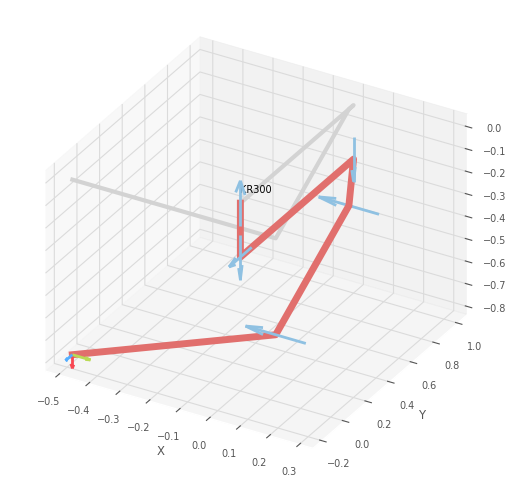

<Figure size 640x480 with 0 Axes>

In [2]:
import roboticstoolbox as rtb
pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.launch()
pyplot.add(t)              # add the robot to the backend
t.q = t.qz             # set the robot configuration
pyplot.step() 

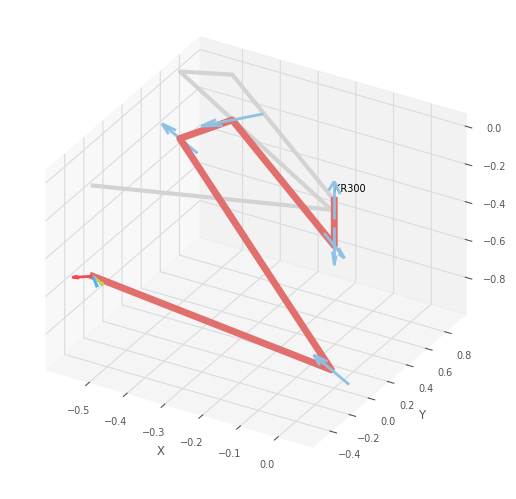

PyPlot3D backend, t = 20.00000000000015, scene:
  robot: Text(0.0, 0.0, 'KR300')

<Figure size 640x480 with 0 Axes>

In [29]:
t.plot((y_test[100:500,:]/180*np.pi), movie = "here.gif")

In [14]:
T = t.fkine(y_test[1,:])
q, *_ = t.ikine(T)
t.plot(q)

AttributeError: 'myrobo' object has no attribute 'ikine'

AttributeError: 'myrobo' object has no attribute '_super_'

In [22]:
t

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
│  q2       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│  q3 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q4       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q5       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q6       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

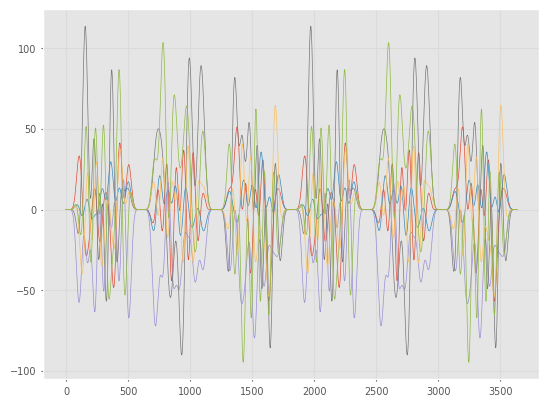

In [24]:
import matplotlib.pyplot as plt
plt.plot(y_test)

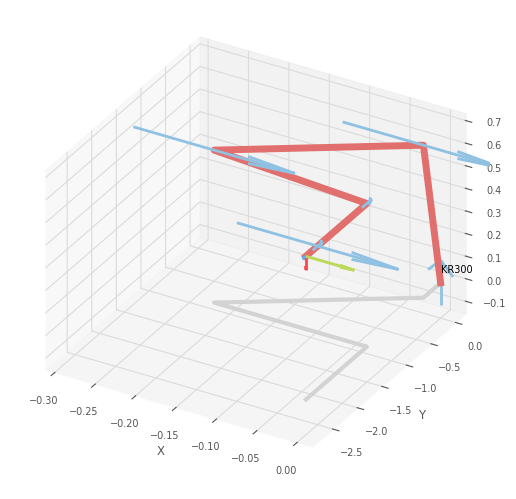

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KR300')

<Figure size 640x480 with 0 Axes>

In [42]:
t.plot(y_test[0]/180*np.pi)

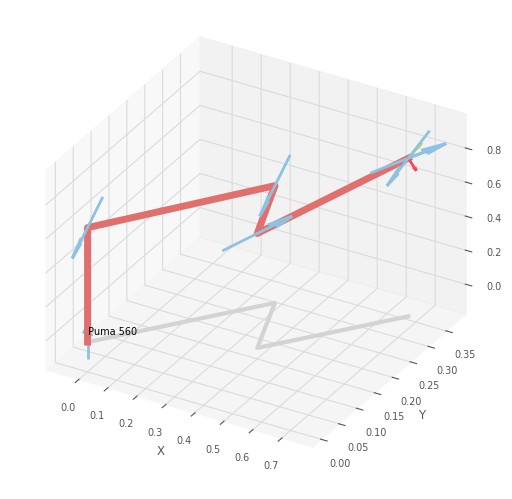

PyPlot3D backend, t = 20.00000000000015, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [31]:
puma = rtb.models.DH.Puma560()
puma.plot((y_test[100:500,:]/180*np.pi), movie = "here.gif")


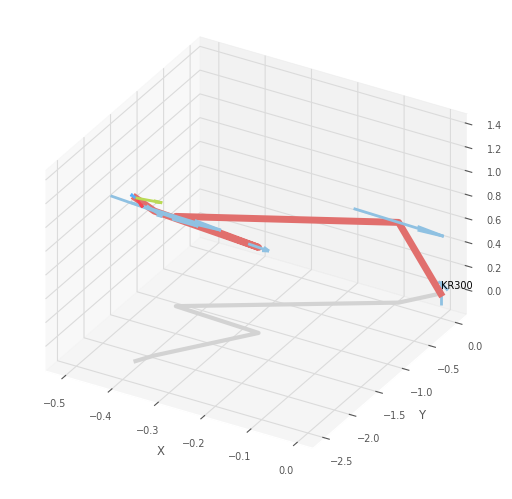

PyPlot3D backend, t = 17.20000000000011, scene:
  robot: Text(0.0, 0.0, 'KR300')

<Figure size 640x480 with 0 Axes>

In [44]:
t.plot((y_test[200:,:]/180*np.pi)[::10], movie = "here_t_ordered.gif")


In [40]:
t.ikine_GN

<bound method RobotKinematicsMixin.ikine_GN of DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│  q1       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
│  q2       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q3       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q4 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q5       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│ -q6 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘
>